In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
archivo = open("datos_punto7.csv")
datos = pd.read_csv(archivo,sep=',')
print(datos)

           x         y
0  -3.186022 -0.126490
1   0.392737  3.396318
2  -4.817696 -0.032391
3  -1.577942  0.069783
4  -8.935573  0.017409
5  -0.592758  0.727137
6   4.934335  4.475377
7  -7.722024  0.024865
8   5.616402  4.506522
9  -5.407019  0.011716
10  1.601067  4.511663
11 -5.550964 -0.036123
12 -3.583489 -0.069709
13 -5.223766  0.003032
14  0.253055  2.943534
15 -8.073227 -0.009959
16  6.562836  4.422080
17  4.957488  4.471753
18 -6.739070  0.028901
19  6.789948  4.578817
20 -4.683477 -0.010250
21  7.882835  4.514181
22 -4.672545 -0.084745
23 -6.398048 -0.018367
24 -3.347306 -0.098493
25 -9.373003 -0.049116
26 -4.784002  0.013133
27 -3.636327  0.036446
28 -5.255305 -0.030479
29 -8.450866  0.055993
30 -4.638201  0.019700
31 -6.095493 -0.049814
32  9.448117  4.528865
33 -1.816208  0.015519
34  8.931352  4.547974
35 -6.427343  0.026792
36  9.639363  4.439721
37  1.157599  4.342836
38 -2.373627 -0.015373
39  9.033973  4.546410
40 -6.856653 -0.006107
41  3.017532  4.495061
42 -8.08102

In [31]:
x = np.float64(datos['x'])
y = np.float64(datos['y'])

ENUNCIADOS A Y B

In [32]:
def modelo(x,p):
    return p[0]/(p[1]+np.exp(-p[2]*x))

def funcion_costo(p,x,y):
    return np.sum((y-modelo(x,p))**2)

ENUNCIADO D

In [33]:
def gradiente_fc(p,x,h=1e-6):
    dim=len(p)
    J=np.zeros(dim)
    for j in range(dim):
        h_=np.zeros(dim)
        h_[j]=h
        J[j]=(modelo(x,p+h_)-modelo(x,p-h_))/(2*h)
    return J

ENUNCIADO E

In [38]:
def sol_func(p,x,y,modelo=modelo,tasa_ap=5e-4,max_iter=int(1e4),error=1e-2):
    d=1
    it=0
    while d > error and it < max_iter:
        valor_0 = funcion_costo(p,x,y)
        Suma =0
        for i in range(len(y)):
            Suma += (y[i]-modelo(x[i],p))*gradiente_fc(p,x[i])
        p=p-tasa_ap*(-2)*Suma
        valor_1=funcion_costo(p,x,y)        
        d=np.abs(valor_0-valor_1)/valor_1
        d=np.sqrt(valor_1/len(y)) 
        it+=1
        
    if d < error:
        print("Entrenamiento completo", d, "iteraciones", it)
    return p,it


x_sol,it=sol_func(np.array([1.,1.,1.]), x, y)
print(x_sol)

[4.15951336 0.92110979 2.84500773]


ENUNCIADO F

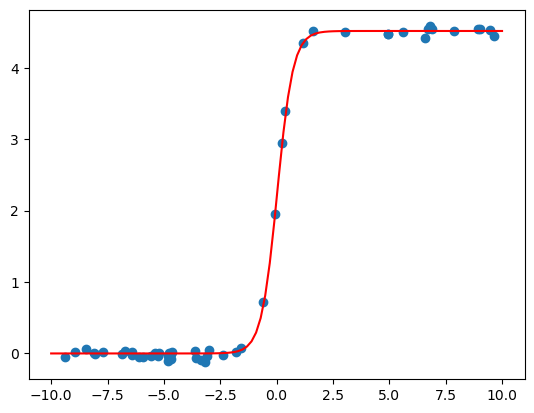

In [39]:
x_=np.linspace(-10,10,100)
plt.figure()
plt.scatter(x,y)
plt.plot(x_,modelo(x_,x_sol),color="r")
plt.show()